# For latest model with dropout comparison

In [1]:
from data_analysis_utils import *
from torch.utils.data import DataLoader
import torch
import math

album_path = '/data/i3store/users/ssued/albums/RNO_album_11_03_2025_20k_unorm/album_RNO4_test.hdf5'
data_set = AlbumDataset(album_path, transform=None, target_transform=None,normalize_labels=True)
data_loader = DataLoader(dataset = data_set, batch_size =1, shuffle = True)

# Initialize previous model (The one below this ipynb block)
prev_checkpoint_path = '/data/condor_shared/users/ssued/machine_learning/vertices_RNO4/model_1.1.1_extra_conv/experiments/exp_e100000000_bn128_tr269_te68_lfn-MSELoss_opt-Adam_hiddenu-20_lr-0.01_lReLU-0.01_extra_conv_layerNObatchnorm/checkpoints/checkpoint_e500.pth'

prev_model = RNO_four_1_1_1s_extraconv_dropout(input_shape=1,
                          hidden_units=32, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=1,
                          num_train_batches=1
                         )

# Initialize new model
curr_checkpoint_path = '/data/condor_shared/users/ssued/machine_learning/vertices_RNO4/model_1.1.1_extra_conv/experiments/exp_e100000000_bn128_tr269_te68_lfn-MSELoss_opt-Adam_hiddenu-32_lr-0.001_lReLU-0.01_extra_conv_layer_dropout-0.1/checkpoints/checkpoint_e1853.pth'

curr_model = RNO_four_1_1_1s_extraconv_dropout(input_shape=1,
                                                  hidden_units=32,
                                                  output_shape=3,
                                                  num_epochs=1,
                                                  batch_size=1,
                                                  num_train_batches=1)

curr_checkpoint = torch.load(curr_checkpoint_path)
curr_model.load_state_dict(curr_checkpoint['model_state_dict'])

prev_analysis = run_data_analysis(prev_model,data_set,data_loader,max_event_num=1000)
curr_analysis = run_data_analysis(curr_model,data_set,data_loader,max_event_num=1000)

/data/condor_shared/users/ssued/mlvenv/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/data/condor_shared/users/ssued/mlvenv/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happ

Computing normalization statistics...
Normalization stats computed:
  r:     mean=1822.4757, std=812.2632
  theta: mean=2.1008, std=0.2724
  phi:   mean=0.0040, std=1.8154
[1822.4757080078125,812.2632446289062,2.100811719894409,0.2724494934082031,0.003992752637714148,1.8153830766677856]
Looping through event: (999/1000)

Text(0, 0.5, 'Frequency')

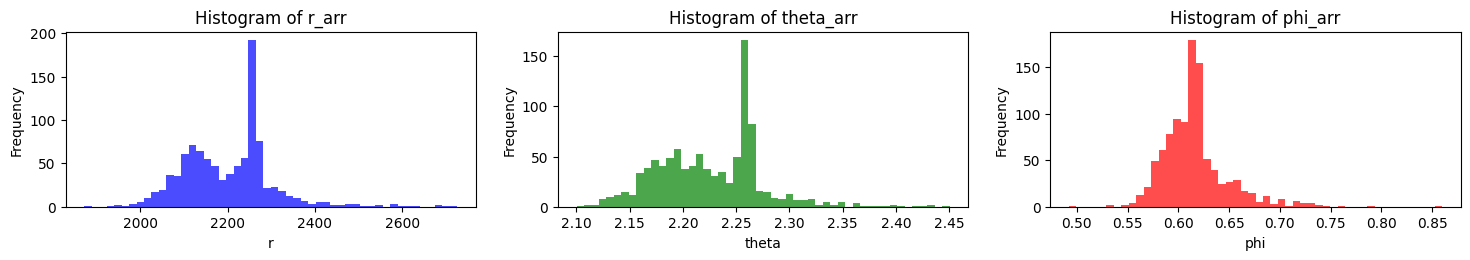

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

plt.subplot(2, 3, 1)
plt.hist(curr_analysis.radius_guess, bins=50, alpha=0.7, color='blue')
plt.title('Histogram of r_arr')
plt.xlabel('r')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(curr_analysis.theta_guess, bins=50, alpha=0.7, color='green')
plt.title('Histogram of theta_arr')
plt.xlabel('theta')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(curr_analysis.phi_guess, bins=50, alpha=0.7, color='red')
plt.title('Histogram of phi_arr')
plt.xlabel('phi')
plt.ylabel('Frequency')

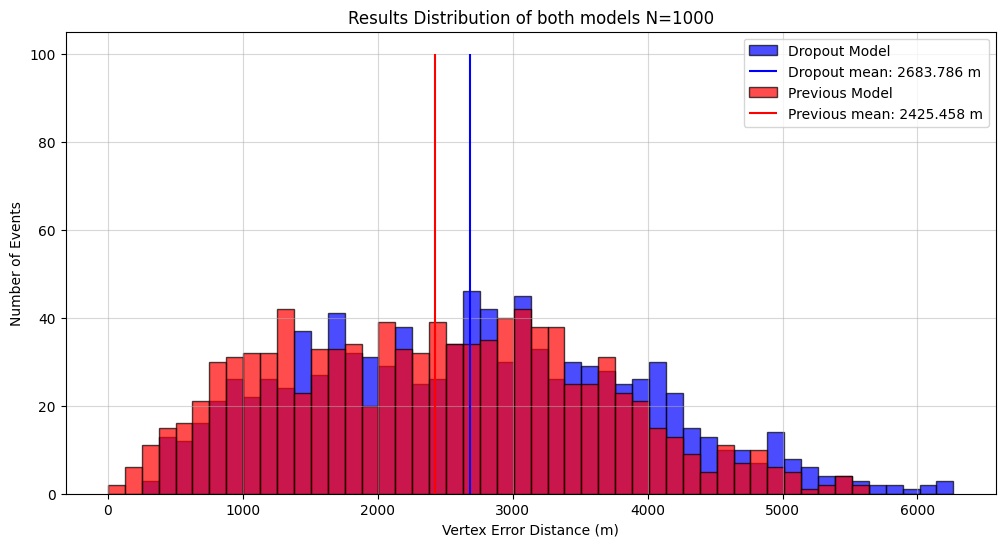

In [4]:
def histogram_distances(distances1, distances2, title = 'Results Distribution of both models N=1000'):
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlabel('Vertex Error Distance (m)')
    ax.set_ylabel('Number of Events')
    ax.grid(True, alpha=0.5)
    
    distance1_mean = np.mean(distances1)
    distance2_mean = np.mean(distances2)

    if distance2_mean >= distance1_mean:
        zorder_1 = 50
    else:
        zorder_1 = 0

    max_distance = np.max(np.concat((distances1, distances2)))
    ax.set_title(title)
    ax.hist(distances1, range = (0,max_distance), bins=50, color='blue', alpha=0.7, edgecolor='black',label='Dropout Model',zorder=zorder_1)
    ax.vlines(distance1_mean,0,100,color='blue',label=f'Dropout mean: {distance1_mean:.3f} m')
    ax.hist(distances2, range = (0,max_distance), bins=50, color='red', alpha=0.7, edgecolor='black',label='Previous Model')
    ax.vlines(distance2_mean,0,100,color='red',label=f'Previous mean: {distance2_mean:.3f} m')
    ax.legend()

histogram_distances(curr_analysis.euclidean_distance_error, prev_analysis.euclidean_distance_error);

## For model_1.1.1_extra_conv on 10k dataset

In [27]:
%matplotlib widget

from cProfile impoadfadvafvafrt label
from data_analysis_utils import *
from torch.utils.data import DataLoader
import torch
import math

album_path = '/data/i3store/users/ssued/albums/RNO_album_10_13_2025_10k/album_RNO4.hdf5'

checkpoint_path = '/data/condor_shared/users/ssued/machine_learning/vertices_RNO4/model_1.1.1_extra_conv/experiments/exp_e100000000_bn128_tr269_te68_lfn-MSELoss_opt-Adam_hiddenu-20_lr-0.01_lReLU-0.01_extra_conv_layerNObatchnorm/checkpoints/checkpoint_e1000.pth'
album = AlbumDataset(album_path, transform=None, target_transform=None,label_transform='spherical')
data_loader = DataLoader(dataset = album, batch_size =1, shuffle = True)

test_model = RNO_four_1_1_1s_extraconv(input_shape=1,
                          hidden_units=20, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=128,
                          num_train_batches=1
                         )

checkpoint = torch.load(checkpoint_path)
test_model.load_state_dict(checkpoint['model_state_dict'])

loss_fn = torch.nn.MSELoss()

import matplotlib.pyplot as plt
import numpy as np

target = None
guess = None

with torch.inference_mode():
    for batch,(X,y) in enumerate(data_loader):
        y_pred = test_model(X)
        guess = y_pred.detach().numpy()
        target = y.squeeze().detach().numpy()
        print(y)
        print(y_pred)

        loss = loss_fn(y_pred.squeeze(), y.squeeze()).item()
        break


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')

def polar2cart(coord):
    r, theta, phi = coord
    
    return [
         r * math.sin(phi) * math.cos(theta),
         r * math.sin(phi) * math.sin(theta),
         r * math.cos(phi)
    ]

def normalized_polar2cart(coord):
    class denormalize_results():
        def __init__(self,denorm_cartesian,denorm_spherical):
            self.denorm_cartesian = denorm_cartesian
            self.denorm_spherical = denorm_spherical
    
    r, theta, phi = coord
    r_denorm = r * album.get_rnorm()
    theta_denorm = theta*2*np.pi
    phi_denorm = phi*2*np.pi

    denorm_spherical = (r_denorm, theta_denorm, phi_denorm)

    x = r_denorm * np.sin(phi_denorm) * np.cos(theta_denorm)
    y = r_denorm * np.sin(phi_denorm) * np.sin(theta_denorm)
    z = r_denorm * np.cos(phi_denorm)

    denorm_cartesian = (x,y,z)

    results = denormalize_results(denorm_cartesian,denorm_spherical)

    return results

x_targ,y_targ,z_targ = normalized_polar2cart(target).denorm_cartesian
r_targ,theta_targ,phi_targ = normalized_polar2cart(target).denorm_spherical
x_guess,y_guess,z_guess = normalized_polar2cart(guess).denorm_cartesian
r_guess,theta_guess,phi_guess = normalized_polar2cart(guess).denorm_spherical

distance = np.sqrt((x_targ - x_guess)**2 + (y_targ - y_guess)**2 + (z_targ - z_guess)**2)

#PRINTING DEBUG
print('target: ', x_targ, y_targ, z_targ)
print('target spherical:', r_targ, theta_targ, phi_targ)
print('target spherical unormalized:', target)
print('guess', x_guess, y_guess, z_guess)
print('guess spherical:', r_guess, theta_guess, phi_guess)
print('guess spherical unormalized:', guess)
print(distance)
print(loss)

ax.set_title(f'Loss: {loss:.6f} Distance: {distance:.3f}')
ax.scatter(0,0,0,label='Origin', marker='o', color='green', s=50)
ax.scatter(x_targ, y_targ, z_targ, label=f'Target ({x_targ:.3f}, {y_targ:.3f}, {z_targ:.3f})', marker='*', color='red', s=100)
ax.scatter(x_guess,y_guess,z_guess,label=f'Guess ({x_guess:.3f}, {y_guess:.3f}, {z_guess:.3f})')
ax.axes.set_xlim(-3900,3900)
ax.axes.set_ylim(-3900,3900)
ax.axes.set_zlim(-2700,0)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
fig.tight_layout()

ax.legend()
plt.show()

SyntaxError: invalid syntax (2561902534.py, line 3)

# For looking at Vertex Error Distance

In [2]:
# Import data_analysis_utils (INCLUDES ALL OTHER UTILS!)
from data_analysis_utils import *
from torch.utils.data import DataLoader

latest_checkpoint_path = '/data/condor_shared/users/ssued/machine_learning/vertices_RNO4/model_1.1.1_extra_conv/experiments/exp_e100000000_bn128_tr269_te68_lfn-MSELoss_opt-Adam_hiddenu-20_lr-0.01_lReLU-0.01_extra_conv_layerNObatchnorm/checkpoints/checkpoint_e1000.pth'

album = AlbumDataset('/data/i3store/users/ssued/albums/RNO_album_10_13_2025_10k/album_RNO4.hdf5', 
                     transform=None, 
                     target_transform=None,
                     label_transform='spherical')
data_loader = DataLoader(dataset = album, batch_size = 1, shuffle = True)

test_model = RNO_four_1_1_1s_extraconv(input_shape=1,
                          hidden_units=20, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=128,
                          num_train_batches=1
                         )

untrained_model = RNO_four_1_1_1s_extraconv(input_shape=1,
                          hidden_units=20, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=128,
                          num_train_batches=1
                         )

checkpoint = torch.load(latest_checkpoint_path)

test_model.load_state_dict(checkpoint['model_state_dict'])

distances = get_vertex_prediction_distances_spher(test_model,album,data_loader,max_event_num=1000)
untrained_distances = get_vertex_prediction_distances_spher(untrained_model,album,data_loader,max_event_num=1000)

/data/condor_shared/users/ssued/mlvenv/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/data/condor_shared/users/ssued/mlvenv/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happ

TypeError: AlbumDataset.__init__() got an unexpected keyword argument 'label_transform'

NameError: name 'distances' is not defined

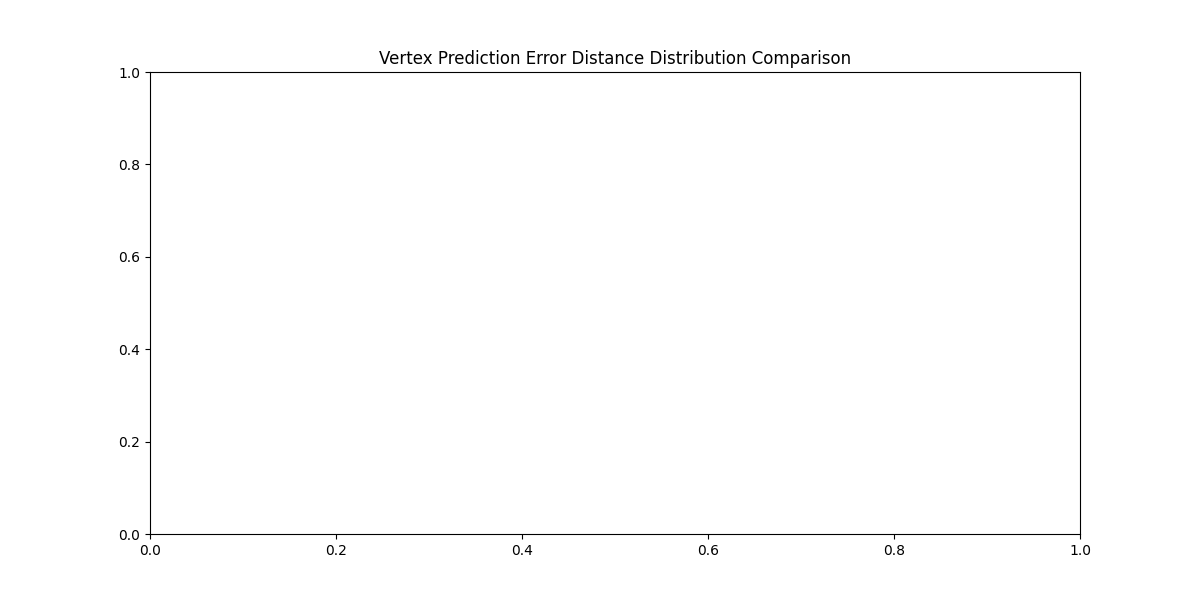

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Vertex Prediction Error Distance Distribution Comparison')
ax.hist(distances.dist, bins=100, color='blue', alpha=0.7, edgecolor='black',label='Trained Model')
ax.vlines(np.mean(distances.dist),0,60,color='blue')
ax.hist(untrained_distances.dist, bins=100, color='red', alpha=0.7, edgecolor='black',label='Untrained Model')
ax.vlines(np.mean(untrained_distances.dist),0,60,color='red')
ax.set_xlabel('Vertex Error Distance (m)')
ax.set_ylabel('Number of Events')
ax.legend()
ax.grid(True, alpha=0.5)

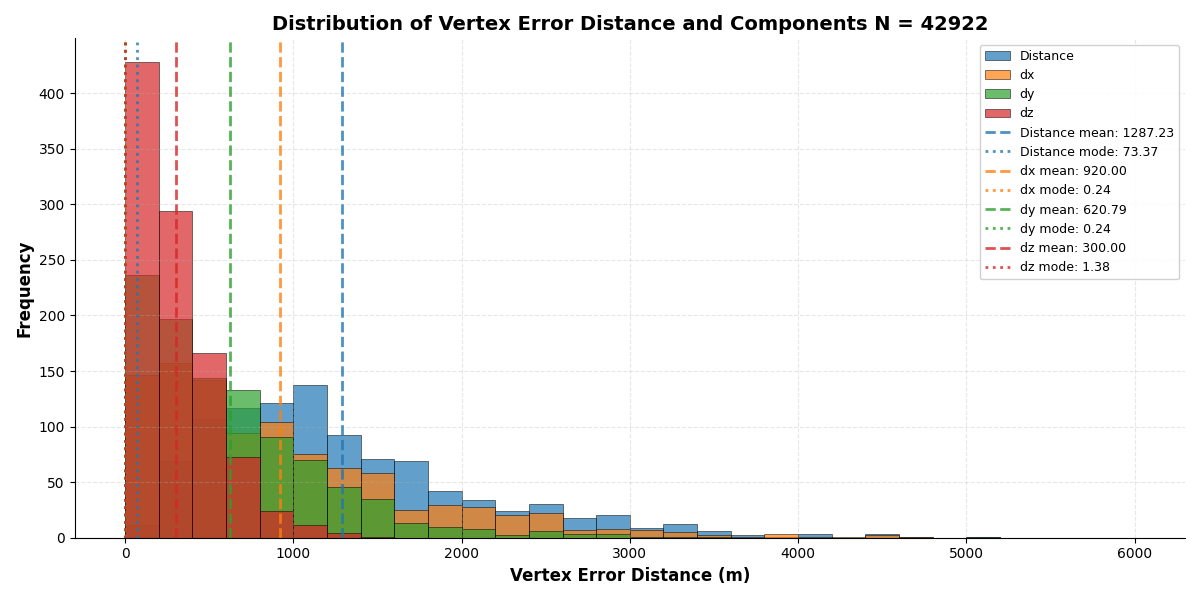

In [ ]:
# Trained Distances

%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

fig, ax = plt.subplots(figsize=(12, 6))

# Plot histograms with better styling
ax.hist(distances.dist, range=(0,6000), bins=30, alpha=0.7, label='Distance', edgecolor='black', linewidth=0.5)
ax.hist(distances.dx, range=(0,6000), bins=30, alpha=0.7, label='dx', edgecolor='black', linewidth=0.5)
ax.hist(distances.dy, range=(0,6000), bins=30, alpha=0.7, label='dy', edgecolor='black', linewidth=0.5)
ax.hist(distances.dz, range=(0,6000), bins=30, alpha=0.7, label='dz', edgecolor='black', linewidth=0.5)

# Calculate and plot mean lines
for data, color, label in zip(
    [distances.dist, distances.dx, distances.dy, distances.dz],
    ['C0', 'C1', 'C2', 'C3'],
    ['Distance', 'dx', 'dy', 'dz']
):
    mean_val = np.mean(data)
    mode_val = stats.mode(data, keepdims=True)[0][0]
    
    ax.axvline(mean_val, color=color, linestyle='--', linewidth=2, alpha=0.8, 
               label=f'{label} mean: {mean_val:.2f}')
    ax.axvline(mode_val, color=color, linestyle=':', linewidth=2, alpha=0.8,
               label=f'{label} mode: {mode_val:.2f}')

# Styling
ax.set_xlabel('Vertex Error Distance (m)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title(f'Distribution of Vertex Error Distance and Components N = {len(data_loader)}', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=9, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

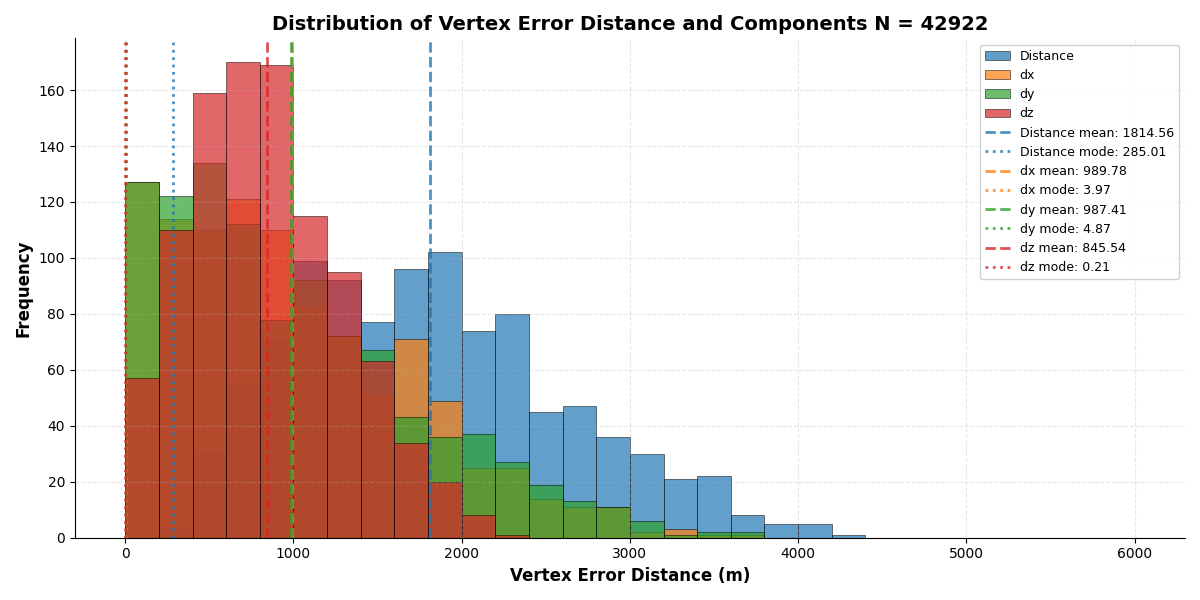

In [ ]:
# Untrained Distances

%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

fig, ax = plt.subplots(figsize=(12, 6))

# Plot histograms with better styling
ax.hist(untrained_distances.dist, range=(0,6000), bins=30, alpha=0.7, label='Distance', edgecolor='black', linewidth=0.5)
ax.hist(untrained_distances.dx, range=(0,6000), bins=30, alpha=0.7, label='dx', edgecolor='black', linewidth=0.5)
ax.hist(untrained_distances.dy, range=(0,6000), bins=30, alpha=0.7, label='dy', edgecolor='black', linewidth=0.5)
ax.hist(untrained_distances.dz, range=(0,6000), bins=30, alpha=0.7, label='dz', edgecolor='black', linewidth=0.5)

# Calculate and plot mean lines
for data, color, label in zip(
    [untrained_distances.dist, untrained_distances.dx, untrained_distances.dy, untrained_distances.dz],
    ['C0', 'C1', 'C2', 'C3'],
    ['Distance', 'dx', 'dy', 'dz']
):
    mean_val = np.mean(data)
    mode_val = stats.mode(data, keepdims=True)[0][0]
    
    ax.axvline(mean_val, color=color, linestyle='--', linewidth=2, alpha=0.8, 
               label=f'{label} mean: {mean_val:.2f}')
    ax.axvline(mode_val, color=color, linestyle=':', linewidth=2, alpha=0.8,
               label=f'{label} mode: {mode_val:.2f}')

# Styling
ax.set_xlabel('Vertex Error Distance (m)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title(f'Distribution of Vertex Error Distance and Components N = {len(data_loader)}', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=9, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()